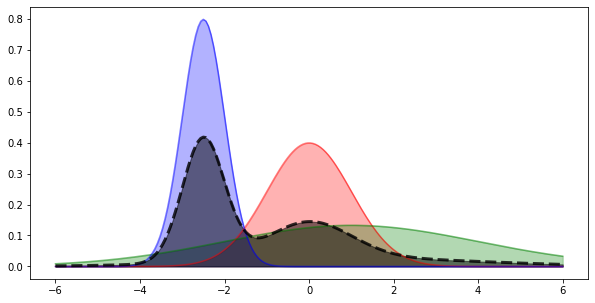

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-6,6,200)
pdf1 = norm.pdf(x,0,1)
pdf2 = norm.pdf(x,1,3)
pdf3 = norm.pdf(x,-2.5,0.5)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x,pdf1,color='r',alpha=0.5)
ax.fill_between(x,pdf1,color='r',alpha=0.3)
ax.plot(x,pdf2,color='g',alpha=0.5)
ax.fill_between(x,pdf2,color='g',alpha=0.3)
ax.plot(x,pdf3,color='b',alpha=0.5)
ax.fill_between(x,pdf3,color='b',alpha=0.3)
pdf4 = 0.3*pdf1 + 0.2*pdf2 + 0.5*pdf3
ax.plot(x, pdf4, color='k', alpha=0.8, linewidth=3.0, linestyle='--')
ax.fill_between(x, pdf4, color='k', alpha=0.5)

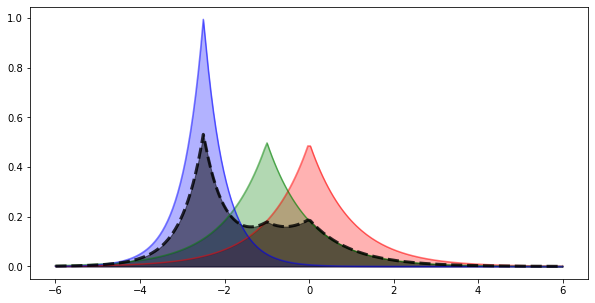

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace
x = np.linspace(-6,6,200)
pdf1 = laplace.pdf(x,0,1)
pdf2 = laplace.pdf(x,-1,1)
pdf3 = laplace.pdf(x,-2.5,0.5)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(x,pdf1,color='r',alpha=0.5)
ax.fill_between(x,pdf1,color='r',alpha=0.3)
ax.plot(x,pdf2,color='g',alpha=0.5)
ax.fill_between(x,pdf2,color='g',alpha=0.3)
ax.plot(x,pdf3,color='b',alpha=0.5)
ax.fill_between(x,pdf3,color='b',alpha=0.3)
pdf4 = 0.3*pdf1 + 0.2*pdf2 + 0.5*pdf3
ax.plot(x, pdf4, color='k', alpha=0.8, linewidth=3.0, linestyle='--')
ax.fill_between(x, pdf4, color='k', alpha=0.5)

In [3]:
import itertools as it
def generate_data(N=3):
    D2 = np.array(list(it.product([-1,1],repeat=N*N)))
    D = [];
    for i in range(0,len(D2)):
        d = D2[i]
        D.append(d.reshape([N,N]))
        x = [];
    for i in range(-(N-2),N-1):
        for j in range(-(N-2),N-1):
            x.append(np.array([float(i),float(j)]))
    return (D,x)

In [7]:
def model0(theta,x,y):
    return 1.0/(pow(2.,len(x)))
def model1(theta,x,y):
    model = 1.0
    for i in range(len(x)):
        model *= 1.0/(1+exp(-y[i]*theta[0]*x[i][0]))
    return model
def model2(theta,x,y):
    model = 1.0
    for i in range(len(x)):
        model *= 1.0/(1+exp(-y[i]*(theta[0]*x[i][0]+theta[1]*x[i][1])))
    return model

def model3(theta,x,y):
    model = 1.0
    for i in range(len(x)):
        model *= 1.0/(1+exp(-y[i]*(theta[0]*x[i][0]+theta[1]*x[i][1]+theta[2])))
    return model

In [8]:
def generate_parameters(N,d,mu,sigma):
    return sigma*np.random.randn(N,d)+mu
# generate the evidence
def compute_evidence(y,x,theta,model):
    evidence = 0.0
    for i in range(len(theta)):
        evidence += model(theta[i],x,y)
    return evidence/len(theta)

In [9]:
N = 3;
nr_samples = pow(10,2)
sigma = pow(10,1.5)
mu = 0
[D, x] = generate_data(N)
[theta, theta_prior] = generate_parameters(nr_samples,3,mu,sigma)
evidence = np.zeros([4,len(D)])
for i in range(len(D)):
    evidence[0,i] = compute_evidence(D[i].ravel(),x,theta,model0)
    evidence[1,i] = compute_evidence(D[i].ravel(),x,theta,model1)
    evidence[2,i] = compute_evidence(D[i].ravel(),x,theta,model2)
    evidence[3,i] = compute_evidence(D[i].ravel(),x,theta,model3)

ValueError: too many values to unpack (expected 2)